***
## IT575: Computational Shape Modeling (Autumn 2024-25)
### Assignment 3: Differential Geometry of Surfaces
#### Student 1 Name: Vraj Thakkar$\underline{\hspace{1in}}$                 Student 1 ID: $202103052\underline{\hspace{1in}}$
#### Student 1 Name: Dhruv Shah$\underline{\hspace{1in}}$                   Student 2 ID: 202103017 $\underline{\hspace{1in}}$
***

In [92]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
#matplotlib qt

##### Q.1 Let $\sigma(u,v) = (u,v,f(u,v))$ be a parameterization of a surface for $(u,v) \in \mathbb{R}^2$, where $f$ is the following polynomial in the two variables $u$ and $v$: $f(u,v) = a_0 + a_1u + a_2v + a_3u^2 + a_4uv + a_5v^2$. The function $f$ can be represented by the coefficient vector $a = (a_0,a_1,\ldots,a_5)$. Write a Python function ```mypolysurface``` that takes an input vector $a$, and
- plots the surface $(u,v,f(u,v))$ for $(u,v) \in [-1,1]\times [-1,1]$ as an appropriately sampled mesh,
- plots the basis of the tangent space $\{\sigma_u,\sigma_v\}$ at the point $\sigma(0,0)$, and the unit normal,
- plots the principal curvature directions scaled by the principal curvatures at $\sigma(0,0)$,
- and colors the mesh according to the Gaussian curvature at corresponding points.

###### Please note that you must do all necessary calculations analytically (neither numerically, nor using symbolic tools in python). An example of a surface plot with an arbitrary 3D arrow is given in the cell below.

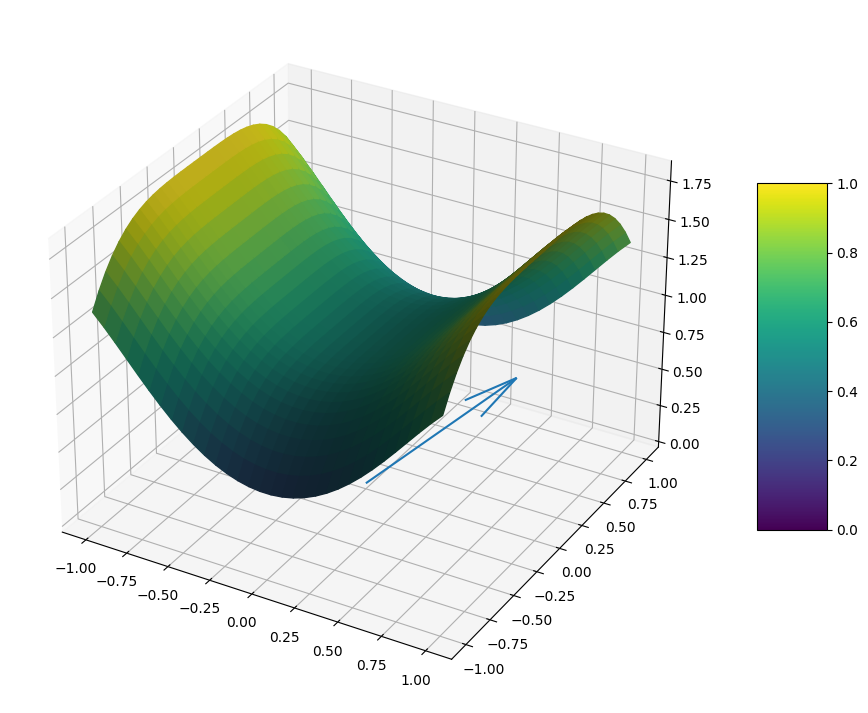

In [93]:
###############################################################
# Example of surface plot using matplotlib. Do not change this.
###############################################################
x = np.outer(np.linspace(-1, 1, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sin(x **2) + np.cos(y **2) )

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
surf = ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(z/z.max()))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.quiver(0,0,0,0.5,0.5,0.5, length=1,normalize=True)

# show plot
plt.show()

In [94]:
###############################################################
# Python function mypolysurface. Fill your code here. Do not run
# examples in this cell.
###############################################################
def mypolysurface(a):
    x = np.outer(np.linspace(-1, 1, 32), np.ones(32))
    y = x.copy().T  # transpose
    z = a[0] + a[1]*x + a[2]*y + a[3]*x**2 + a[4]*x*y + a[5]*y**2

    # Tangent vectors at the point (0,0)
    sigma_u = np.array([1, 0, a[1]])
    sigma_u = sigma_u / np.linalg.norm(sigma_u)
    sigma_v = np.array([0, 1, a[2]])
    sigma_v = sigma_v / np.linalg.norm(sigma_v)
    # Unit normal vector at the point (0,0)
    unit_normal = np.array([-a[1], -a[2], 1])
    nn = np.linalg.norm(unit_normal)
    unit_normal = unit_normal / nn

    # First and second fundamental forms at the point (0,0)
    F1 = [[1 + a[1]**2, a[1]*a[2]], [a[1]*a[2], 1 + a[2]**2]]  # First fundamental form
    F2 = [[2*a[3], a[4]], [a[4], 2*a[5]]]  # Second fundamental form
    F2 = np.array(F2)/nn #normalized second fundamental form
    # Eigenvalues and eigenvectors (principal curvatures and directions)
    eigenvalues, eigenvectors = np.linalg.eig(np.matmul(np.linalg.inv(F1), F2))
    eigenvec_1=eigenvectors[:,0]
    eigenvec_2=eigenvectors[:,1] # these are the coefficients of sigma_u and sigma_v for principal directions
    dir_1 = eigenvec_1[0]*sigma_u + eigenvec_1[1]*sigma_v #get directions for principal curvatures from the coefficients
    norm_1 = np.linalg.norm(dir_1)
    dir_1 = eigenvalues[0]*dir_1/norm_1 #principal directions scaled by the principal value of curvature
    dir_2 = eigenvec_2[0]*sigma_u + eigenvec_2[1]*sigma_v
    norm_2 = np.linalg.norm(dir_2)
    dir_2 = eigenvalues[1]*dir_2/norm_2
    print(eigenvalues)
    # Creating figure
    fig = plt.figure(figsize=(14, 9))
    ax = plt.axes(projection='3d')

    # Creating surface plot
    surf = ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(z / z.max()))
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Plotting the tangent vectors and normal vector
    ax.quiver(0, 0, 0, sigma_u[0], sigma_u[1], sigma_u[2], length=2, color='r', normalize=True)
    ax.quiver(0, 0, 0, sigma_v[0], sigma_v[1], sigma_v[2], length=2, color='b', normalize=True)
    ax.quiver(0, 0, 0, unit_normal[0], unit_normal[1], unit_normal[2], length=2, color='g', normalize=True)

    # Plotting the principal curvature directions
    ax.quiver(0, 0, 0, dir_1[0], dir_1[1], dir_1[2], length=2, color='y', normalize=True)
    ax.quiver(0, 0, 0, dir_2[0], dir_2[1], dir_2[2], length=2, color='y', normalize=True)

    # Show plot
    plt.show()


[5.23606798 0.76393202]


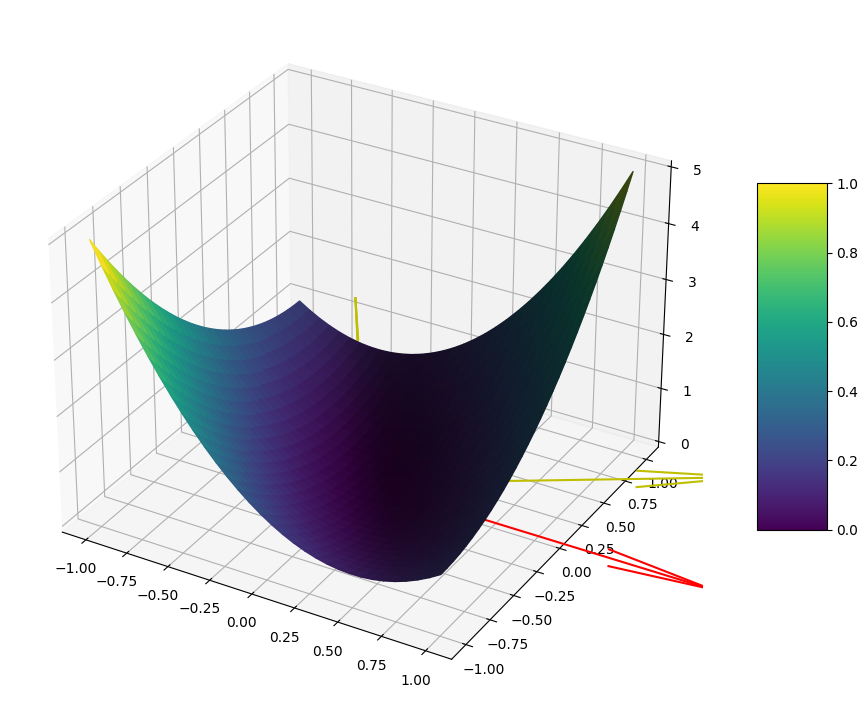

In [95]:
a = [0,0,0,2,2,1]
mypolysurface(a)

#### Run your code for a few examples in the next cell.

[ 8. 10.]


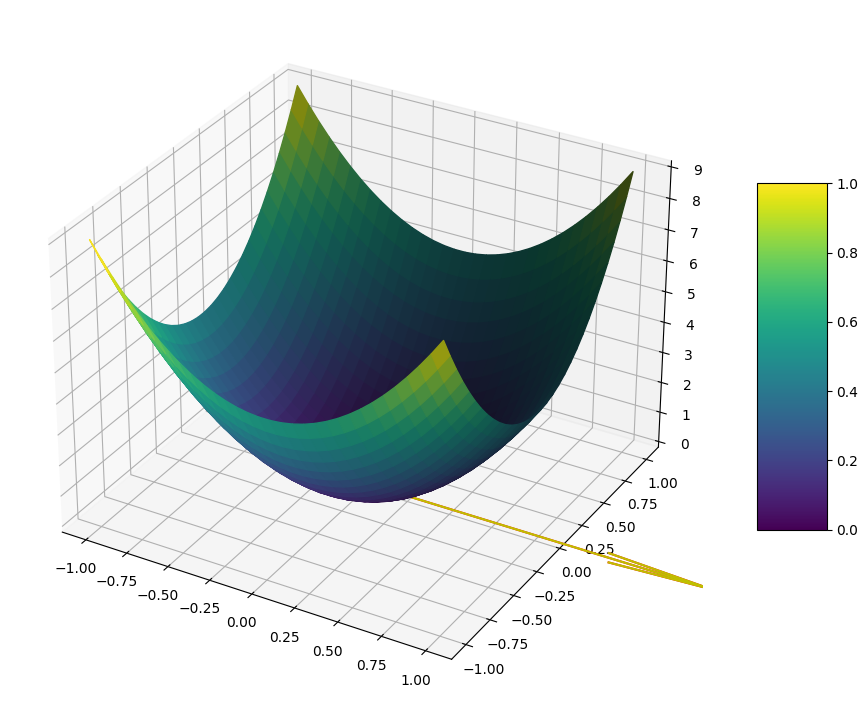

[ 8. -2.]


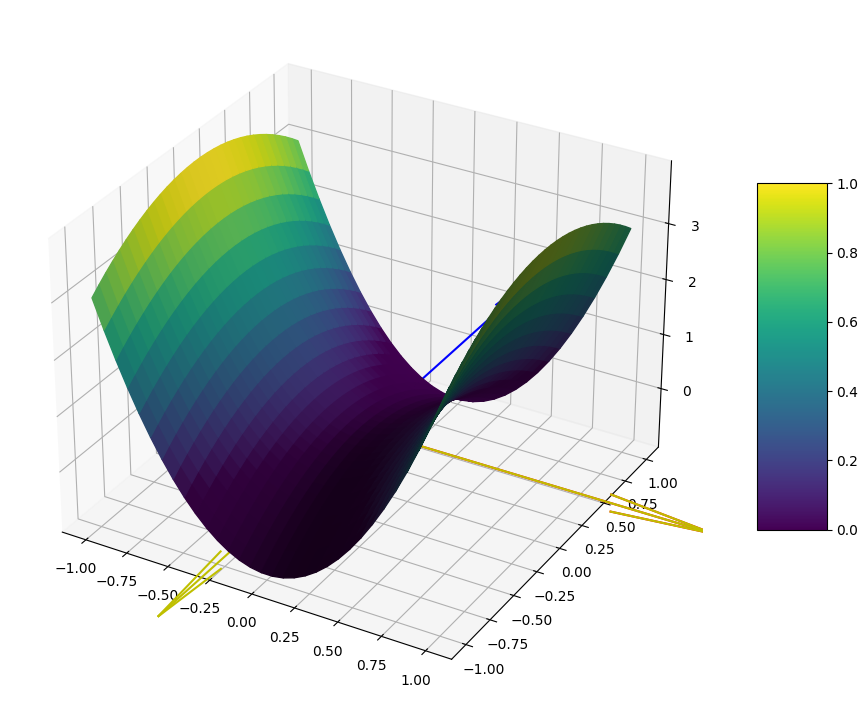

[4. 0.]


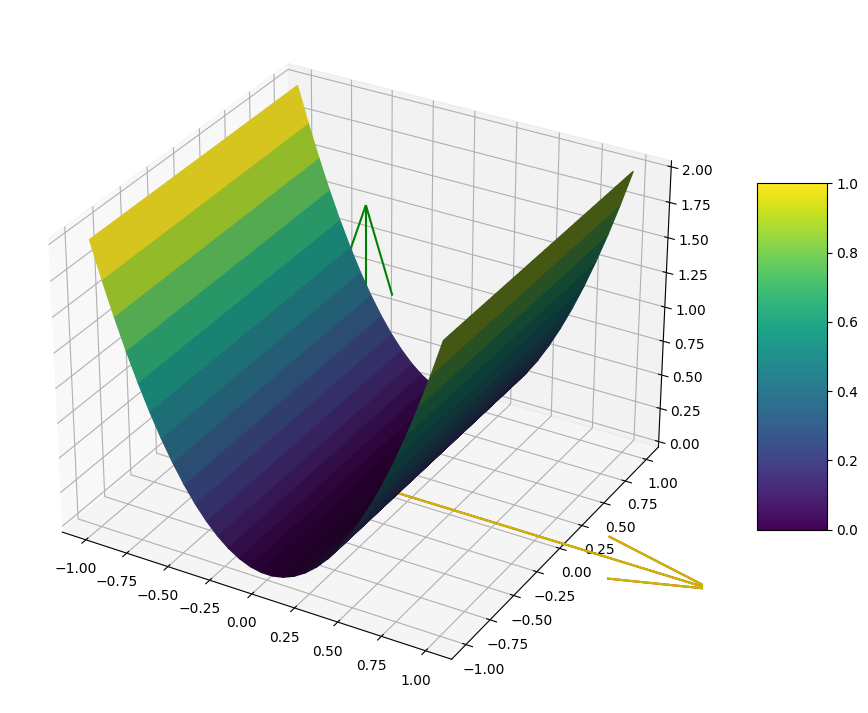

[5.55111512e-17 7.69800359e-01]


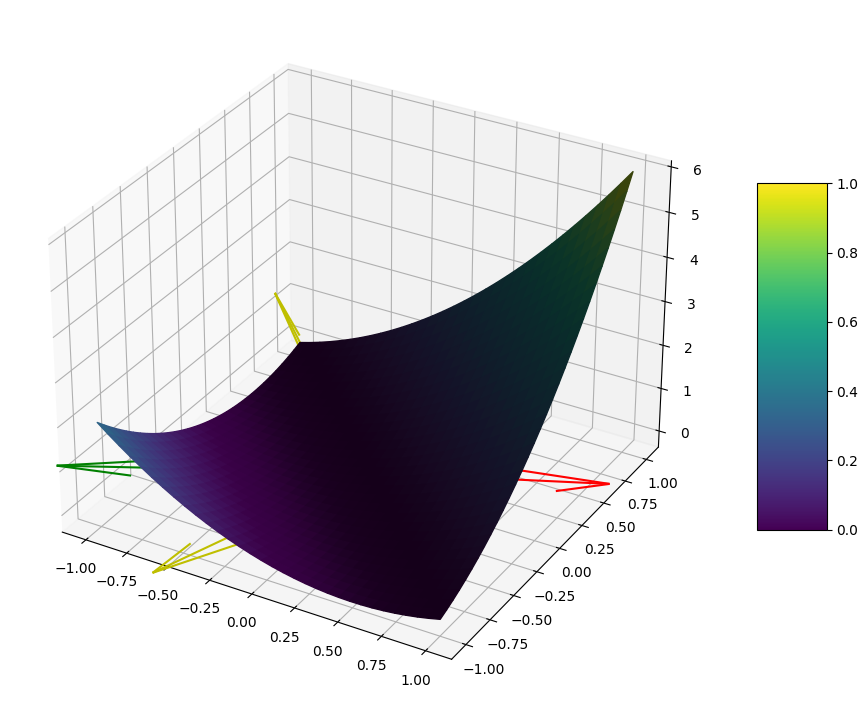

In [97]:
#### Write examples of polynomial parametric surfaces in this cell and run mypolysurface;
#for k1>0, k2>0
a = [0,0,0,4,0,5]
mypolysurface(a)
#for k1<0, k2>0
a = [0,0,0,4,0,-1]
mypolysurface(a)
#for k1>0, k2=0
a = [0,0,0,2,0,0]
mypolysurface(a)
#for k1=k2=0
a = [0,1,1,2,4,2]
mypolysurface(a)

##### Q.2: Given a surface patch $\sigma(u,v) = (u,v,f(u,v))$ where $f:\mathbb{R}^2 \rightarrow \mathbb{R}$ is an arbitrary smooth function, compute the
 - First fundamental form and unit normal to the surface at a point $\sigma(u,v)$,
 - The Second fundamental form and principal curvatures $\kappa_1,\kappa_2$ at a point $\sigma(u,v)$.
 - Plot examples of surfaces (using code written in Question 1) with points where:
    - $\kappa_1 >0, \kappa_2 > 0$.
    - $\kappa_1 <0, \kappa_2 > 0$.
    - $\kappa_1 >0, \kappa_2 = 0$.
    - $\kappa_1 = \kappa_2 = 0$, but the surface is not a flat plane.

#### Either write your answer (in LaTeX) or paste a scanned image of a neat handwritten answer in this cell

First Fundamental Form for $\sigma(u,v) = (u,v,f(u,v))$ where $f:\mathbb{R}^2 \rightarrow \mathbb{R}$ is an arbitrary smooth function will be

\begin{bmatrix}
1+ f_u^2 & f_uf_v \\
f_vf_u & 1+f_v^2
\end{bmatrix}

Normal vector is $[ -f_u, -f_v,1]$

Second Fundamental form is

\begin{bmatrix}
\frac{f_{uu}}{\sqrt(f_v^2 + f_u^2 + 1)} & \frac{f_{uv}}{\sqrt(f_v^2 + f_u^2 + 1)} \\
  \frac{f_{vu}}{\sqrt(f_v^2 + f_u^2 + 1)} & \frac{f_{vv}}{\sqrt(f_v^2 + f_u^2 + 1)}
\end{bmatrix}

Now $F_1^{-1} F_2$ will be

$$
\mathbf{S}=\frac{1}{\sqrt{f_u^2+f_v^2+1}} \cdot \frac{1}{1+f_u^2+f_v^2}\left(\begin{array}{cc}
\left(1+f_v^2\right) f_{u u}-f_u f_v f_{u v} & \left(1+f_v^2\right) f_{u v}-f_u f_v f_{v v} \\
-f_u f_v f_{u u}+\left(1+f_u^2\right) f_{u v} & -f_u f_v f_{u v}+\left(1+f_u^2\right) f_{v v}
\end{array}\right)
$$

The eigenvectors of this matrix are the coefficients of the basis of tangent space of the surface at point $\sigma(u,v)$ $\sigma_u$ and $\sigma_v$ and the eigen values show the amount of the curvature corresponding to the principal directions. Now if we consider f(u,v) to be a quadratic function we can find the expressions for all the asked conditions for k1 and k2. I assumed the function to be $f(u,v)$ = $au^2$ + $bv^2$ and then the equation for eigen values turn out to be (λ - 2a)(λ - 2b) = 0 so for k1>0 and k2>0 we want both a,b>0. For k1>0 and k2<0 we will want a>0 and b<0 and for k1>0 and k2=0 we will want a>0 and b=0. For k1=0 and k2=0 we can observe another fact that the matrix S has both eigen values = 0 when $f_{uv}$ = $f_{uu}$ = $f_{vv}$ and $f_{u}$ = $f_{v}$ putting these in $f(u,v) = a_0 + a_1u + a_2v + a_3u^2 + a_4uv + a_5v^2$ we will get $a_3 = a_5$ , $a_3 = 2a_4$ and $a_1$ = $a_2$.
